Creates figure with geotif in background and boxes for my subregion(s) and an inset map. <br><br>
To find colors, use this link: https://docs.generic-mapping-tools.org/6.2/gmtcolors.html <br><br>
Written 5-31-23
***

In [2]:
#Import pygmt
import pygmt

#Import any other modules you want to use
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
'''
GEE: 
// Laguna Salada
 var region = /* color: #d63000 */ee.Geometry.Polygon(
        [[[-117, 31.5],
          [-117, 33.5],
          [-114, 33.5],
          [-114, 31.5]]]);
var vizparams = {
  bands: ['B4', 'B3', 'B2'], 
  min:360, 
  max: 4250, 
  gamma:1.6
}
'''

Define the boxes for frames, Jiang and Lohman study area, and my focus region and cropped region.

In [2]:
frame485=np.array(
    [[-114.607567, 32.71468], # got this info from OSL: /LagunaSalada/list.csv
     [-114.97776, 31.090954],
     [-117.601303, 31.496145],
     [-117.280273, 33.117657],
     [-114.607567, 32.71468]]
     )
frame480=np.array(
    [[-114.262985, 34.209965], # got this info from OSL: /LagunaSalada/list.csv 
     [-114.639206, 32.586636],
     [-117.306984, 32.989609],
     [-116.983658, 34.610931],
     [-114.262985, 34.209965]]
     )

JiangLohman=np.array(
    [[-116.2, 32.4], 
     [-116.2, 33.5], 
     [-115, 33.5],
     [-115, 32.4],
     [-116.2, 32.4]]
)
largeArea=np.array(
    [[-115.055677567246, 32.615454326997], 
     [-115.80872046165,32.7327620756761], 
     [-115.924182661749,32.2902303595692],
     [-115.155420271133,32.169824434697],
     [-115.055677567246,32.615454326997]]
)
smallArea=np.array(
    [[-115.007286694016,32.8360065284444], 
     [-115.43488213151,32.9030092005015], 
     [-115.48384819789,32.6828729687555],
     [-115.055653224566,32.6155786818662],
     [-115.007286694016,32.8360065284444]]
)
cropArea=np.array(
    [[-115.836432879008,32.6091356230372], 
     [-115.67545199537,32.5844209517118], 
     [-115.70451723996,32.4482959068315],
     [-115.869488060882,32.4736661354179],
     [-115.836432879008,32.6091356230372]]
)

Load in coordinates of Laguna Salada outline that I copied from Vertex in a weird format. This reformats it.

In [3]:
LS_file = '/data/ocp4/LagunaSalada/Data_and_Figs/16_PyGMT/Laguna_Salada_outline.txt'
# Read in coordinates from file
coords = np.loadtxt(LS_file, delimiter=',',dtype=str)
numCoords = len(coords)
coords2 = np.ndarray((len(coords),2),dtype='float')
for i in range(numCoords):
    coords2[i,0] = float(coords[i].split(' ')[0])
    coords2[i,1] = float(coords[i].split(' ')[1])
#print(coords2[0,1])
print('Laguna Salada outline coordinates loaded.')

Laguna Salada outline coordinates loaded.


Figure 1: very zoomed out, optical image of S. California + Mexico, with outlines of the frame, Jiang and Lohman 2021 study area, and my cropped region outlined. Added outline of Laguna Salada recently.

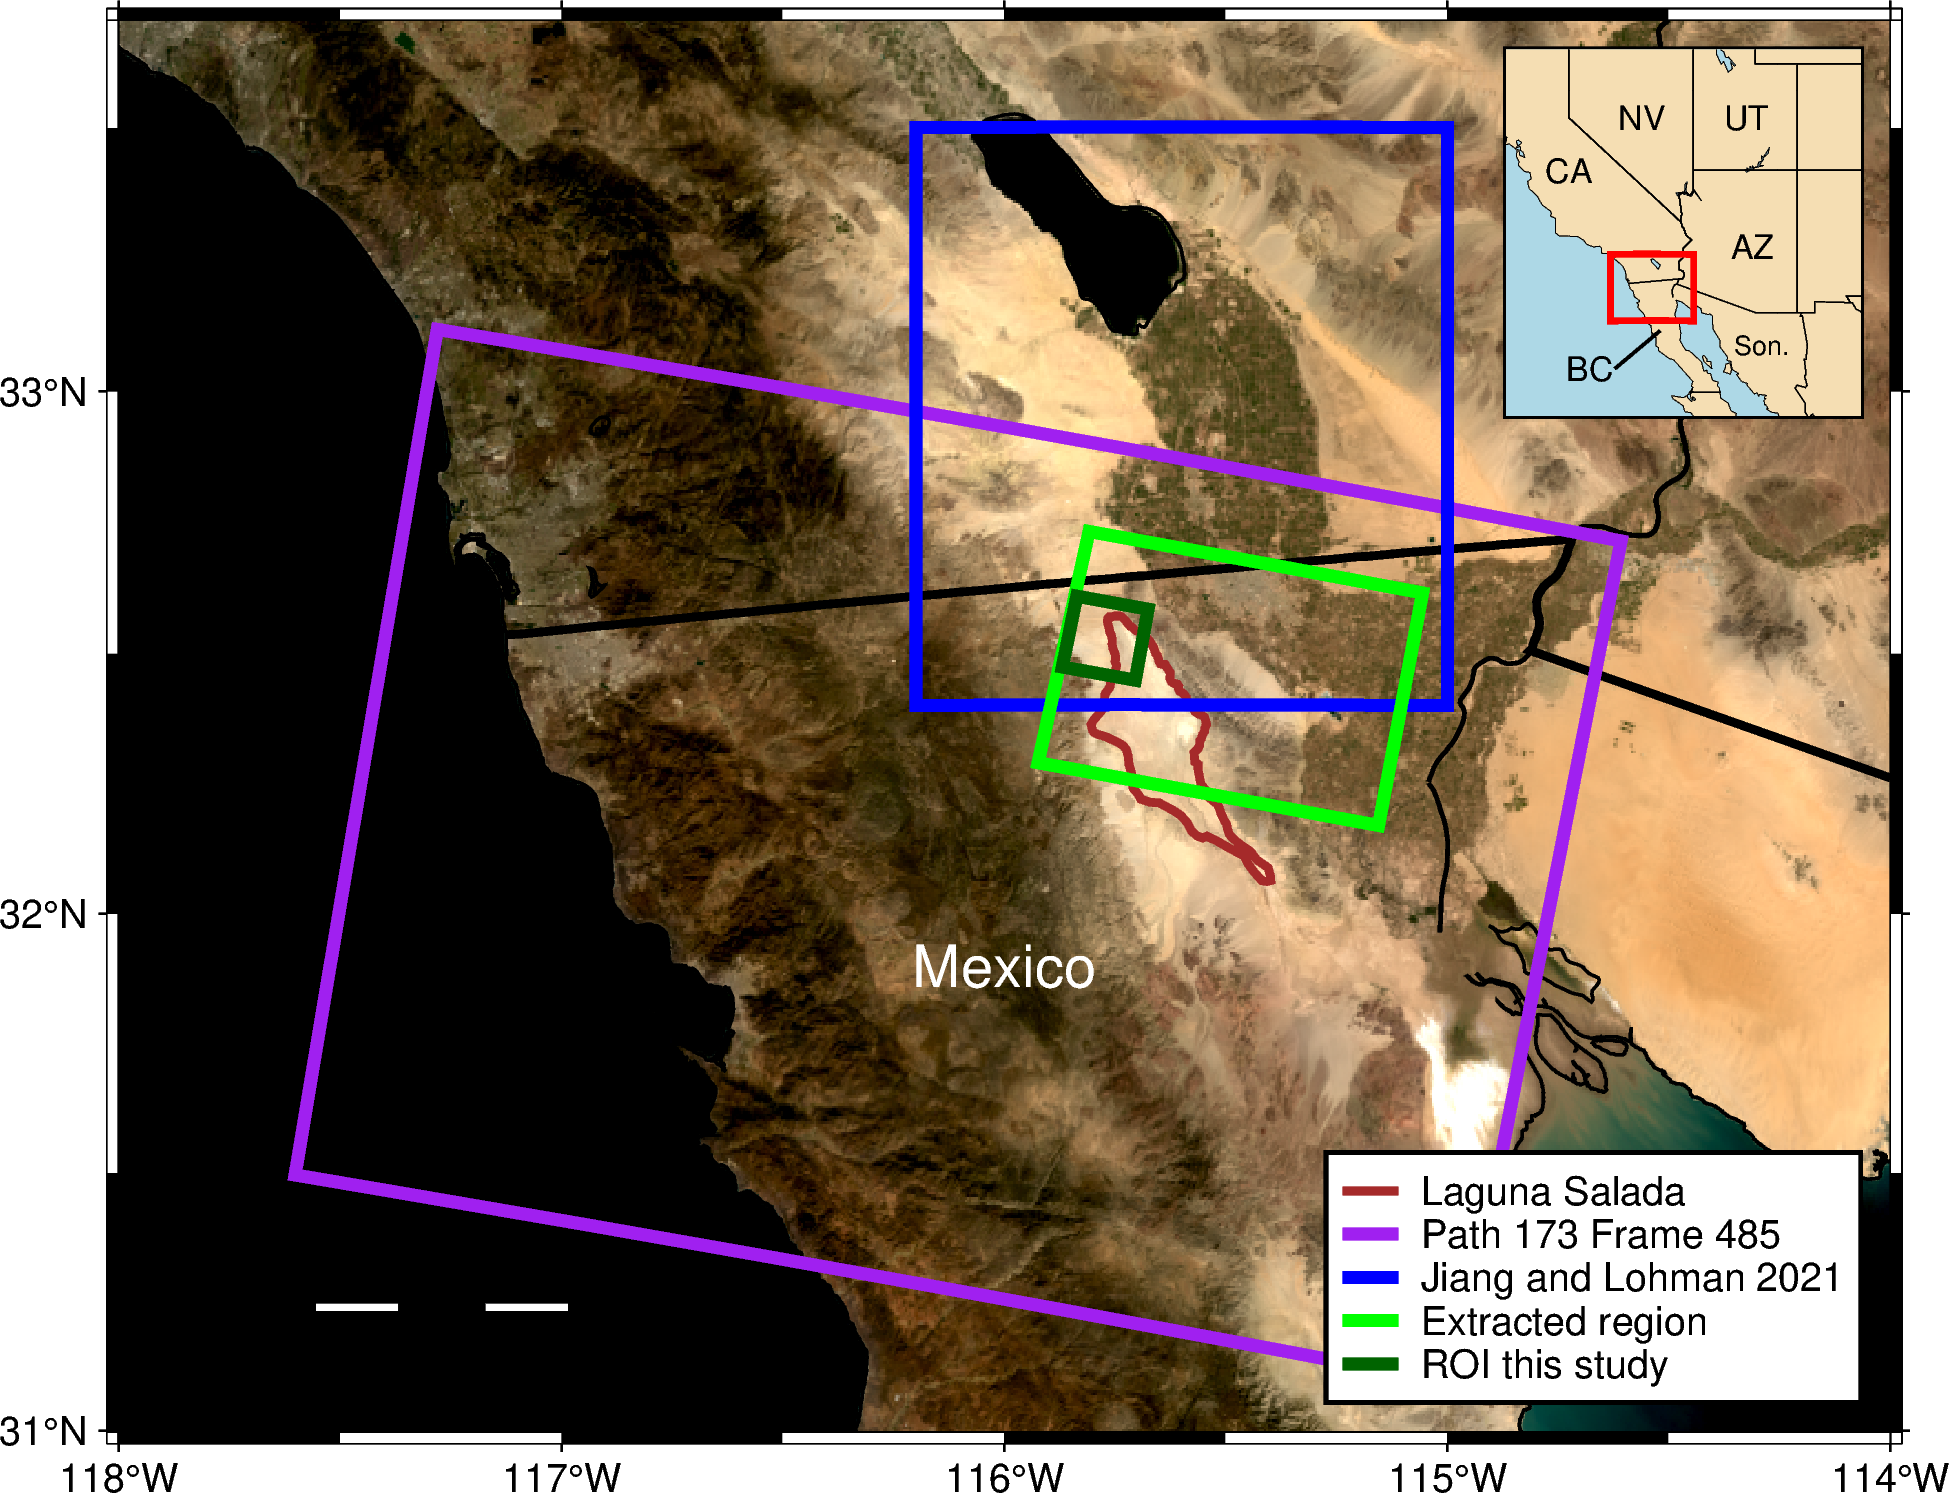

In [4]:
#create the region you want to plot on your map 
#region_plot=[-118,-113,30.9978192239,35.0028192239]
region_plot=[-118,-114,30.9978192239,33.7028192239] # cropped 
region_inset=[-123,-106,27,41.5]
proj = "M15c"
#create the pygmt figure 
fig = pygmt.Figure()
# load the geotiff I got from Google Earth Engine
grid = '/data/ocp4/LagunaSalada/Data_and_Figs/16_PyGMT/LS_Landsat.tif'
#grid = '/data/ocp4/LagunaSalada/Data_and_Figs/16_PyGMT/LS_optical_image_cropped_for_Fig1.tif'
fig.grdimage(
    grid=grid,
    region=region_plot,
    projection=proj
    #cmap=('red','green','blue')
    ) 
fig.coast(
    region=region_plot, 
    projection=proj,
    frame=["WSne", "xa1f0.5", "ya1f0.5"],
    # labels on West and South borders, not on north and east
    # a1- annotate every 1 degree 
    # f0.5- space the black/white bars by 0.5 degrees
    borders=["1/thickest,black", "2/thick,black"], # 1=country borders, 2=state borders, a=all
    shorelines='thin,black',
    # Use dcw to selectively highlight an area (country or state)
    #dcw="US.CA",#"US.CA+gred",
    )
#fig.coast(water="lightblue")# just for figuring out the scale bar 
#x and y are lon and lat coordinates, angle - can rotate font from horizontal
fig.text(text="California", x=-116.4, y=34.1, font="14p,white", angle=0)
fig.text(text="Mexico", x=-116, y=31.9, font="14p,white", angle=0)
fig.text(text="Arizona", x=-113.8, y=33.3, font="14p,white", angle=0)

# plot outline of LS
fig.plot(x=coords2[:,0],y=coords2[:,1], pen="2p,brown",label='Laguna Salada')

fig.plot(x=frame485[:,0], y=frame485[:,1],pen="3p,purple",label="Path 173 Frame 485")
#fig.plot(x=frame480[:,0], y=frame480[:,1],pen="3p,brown",label="Path 173 Frame 480")
fig.plot(x=JiangLohman[:,0], y=JiangLohman[:,1],pen="3p,blue",label="Jiang and Lohman 2021")
fig.plot(x=largeArea[:,0], y=largeArea[:,1],pen="3p,green",label="Extracted region, this study")
#fig.plot(x=smallArea[:,0], y=smallArea[:,1],pen="3p,green",label="ROI this study")
fig.plot(x=cropArea[:,0], y=cropArea[:,1],pen="3p,darkgreen",label="ROI this study")

# put a white box behind the scale bar since the box= option isn't working below.
#scale_rect = [[-117.85, 31.1, -116.65, 31.4]]    
#scale_rect = [[-117, 32, -116, 33]]   
#fig.plot(data=scale_rect, style="r+s", pen="1.5p,black", fill="white") 

# add the scale bar so it goes on top of frame box
fig.basemap(
    map_scale=["f-117.27/31.25/20/100+lkm"], # +u adds units to the numbers, +lkm adds title to scale bar of "km"
    box="+gwhite+p1p" # NOT WORKING 
)
#fig.basemap(frame=["+tMap"]) to add title 
with fig.inset(
    position="jTR+o0.25c/0.25c", 
    # j (lower case) = within map area, upper case = outside map area, TR=Top Right,
    # +w3c/3.1c - width/height of map, +o0.25c/0.25c is the offset from x and y corner position, box="+pblack" - adds black outline around map
    box="+pblack",
    region=region_inset,
    projection="M3c"
    ): 
    fig.coast(
        land="wheat",
        borders=["a"], # add all state borders
        water="lightblue",
        shorelines="0.1p",
        area_thresh=500
        )
    fig.text(text="NV", x=-116.5, y=39)
    fig.text(text="UT", x=-111.5, y=39)
    fig.text(text="CA", x=-120, y=37)
    fig.text(text="AZ", x=-111.2, y=34)
    fig.text(text="Son.", x=-110.75, y=30, font="6.5p")
    fig.text(text="BC", x=-119, y=29)
    fig.plot(x=-117.8, y=29, style="v0c", pen="0.8p", direction=[[40], [0.5]]) #[angle in degrees],[length]
    rectangle = [[region_plot[0], region_plot[2], region_plot[1], region_plot[3]]]    
    fig.plot(data=rectangle, style="r+s", pen="1.5p,red")    
    # r- rectangle 
    # "+s" means that the first two columns are the longitude and latitude of the bottom left corner of the rectangle, 
    # and the last two columns the longitude and latitude of the uppper right corner.


#plot the legend in position you want and add white box around it
fig.legend(position="jBR+o0.25/0.25c",box="+gwhite+p1p")
#fig.savefig("/data/ocp4/LagunaSalada/Data_and_Figs/16_PyGMT/Figure1.png",transparent=True)
fig.show()

Figure 1 (BUT ZOOMED IN): optical image of S. California + Mexico, but now the purple frame box is moved to the inset map, Jiang and Lohman 2021 box is removed, Laguna Salada outline is more prominent, and Cerro Prieto location added as a triangle.

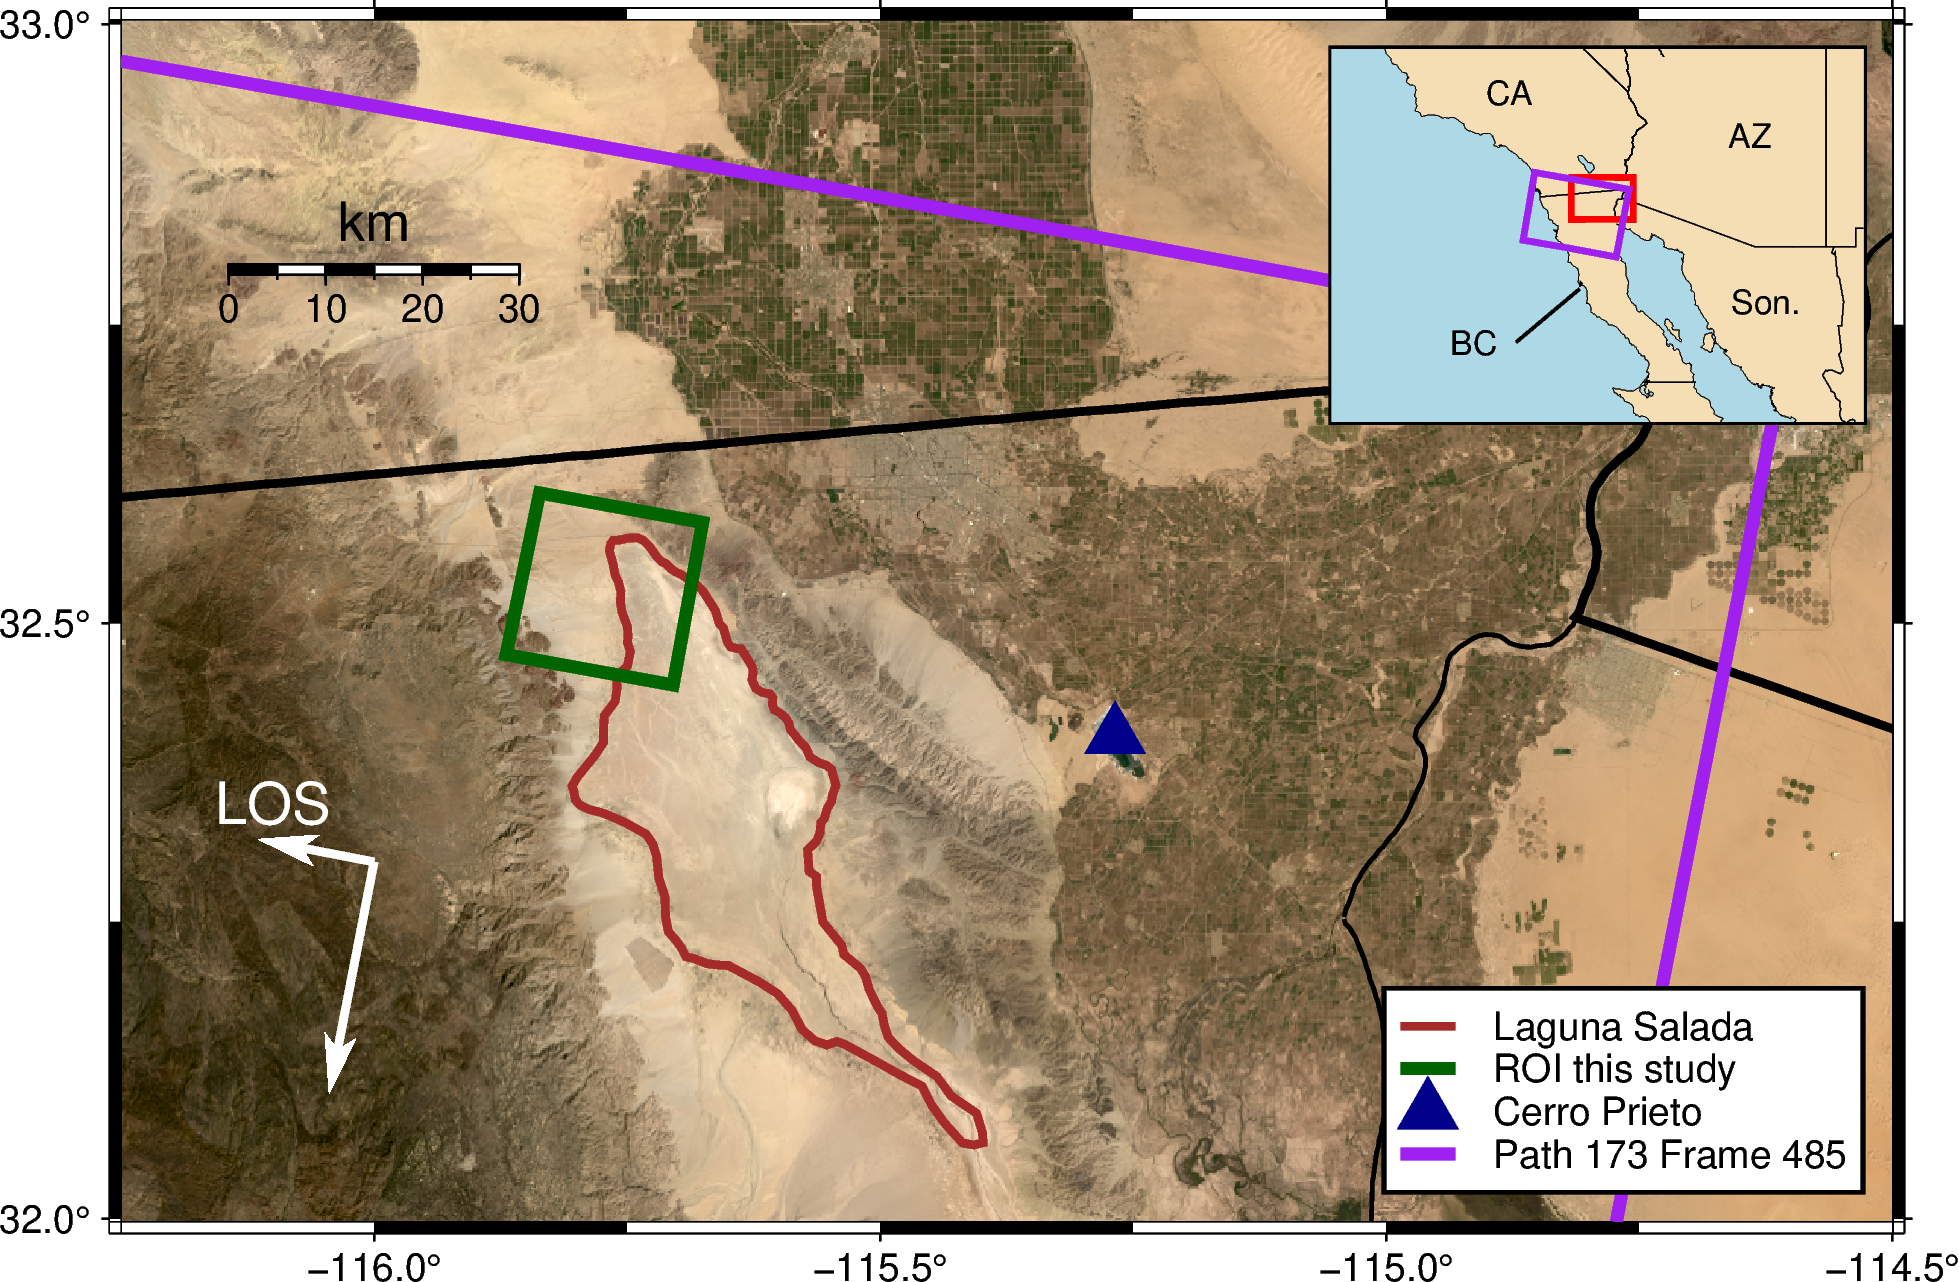

In [10]:
# it doesn't like the 32 and 33 round numbers so I changed it.
region_plot=[-116.25,-114.4995,31.9975193364,33.0040193364]
#region_inset=[-123,-106,27,41.5]
region_inset=[-123,-108,27,36]

proj = "M15c"
#create the pygmt figure 
fig = pygmt.Figure()
pygmt.config(FORMAT_GEO_MAP="ddd.x")

# load the geotiff I got from Google Earth Engine
grid = '/data/ocp4/LagunaSalada/Data_and_Figs/16_PyGMT/LS_Landsat.tif'
# FOR THIS TO WORK: first do this on command line
# >> conda activate pygmt
# >> gdal_translate -co TILED=YES -co BLOCKXSIZE=256 -co BLOCKYSIZE=256 LS_optical_image_cropped_for_Fig1.tif LS_cropped_fixed_colors.tif
grid2 = '/data/ocp4/LagunaSalada/Data_and_Figs/16_PyGMT/LS_cropped_fixed_colors.tif'

fig.grdimage(
    grid=grid2,
    region=region_plot,
    projection=proj
    ) 
fig.coast(
    region=region_plot, 
    projection=proj,
    frame=["WSne", "xa0.5f0.25", "ya0.5f0.25"],
    # labels on West and South borders, not on north and east
    # a1- annotate every 1 degree 
    # f0.5- space the black/white bars by 0.5 degrees
    borders=["1/thickest,black", "2/thick,black"], # 1=country borders, 2=state borders, a=all
    shorelines='thin,black',
    # Use dcw to selectively highlight an area (country or state)
    #dcw="US.CA",#"US.CA+gred",
    )
#fig.coast(water="lightblue")# just for figuring out the scale bar 
#x and y are lon and lat coordinates, angle - can rotate font from horizontal
fig.text(text="California", x=-116.4, y=34.1, font="14p,white", angle=0)
fig.text(text="Mexico", x=-116, y=31.9, font="14p,white", angle=0)
fig.text(text="Arizona", x=-113.8, y=33.3, font="14p,white", angle=0)

# plot outline of LS
fig.plot(x=coords2[:,0],y=coords2[:,1], pen="2p,brown",label='Laguna Salada')
# plot outline of larger cropped area
#fig.plot(x=largeArea[:,0], y=largeArea[:,1],pen="3p,blue",label="Extracted region, this study")
# plot outline of cropped area, ROI for this study
fig.plot(x=cropArea[:,0], y=cropArea[:,1],pen="3p,darkgreen",label="ROI this study")
# plot Cerro Prieto as a point 
fig.plot(x=-115.267894, y=32.405465,style='t0.6c',fill='blue4',label="Cerro Prieto")
# plot outline of SAR frame
fig.plot(x=frame485[:,0], y=frame485[:,1],pen="3p,purple",label="Path 173 Frame 485")

# plot arrow for azimuth
fig.plot(x=-116, y=32.3, style="v0.5c+e", pen="2p,white", fill='white', direction=[[259], [2]]) #[angle in degrees],[length]
fig.plot(x=-116, y=32.3, style="v0.5c+e", pen="2p,white", fill='white', direction=[[169], [1]])
fig.text(text='LOS', x=-116.1, y=32.35, font="14p,white", angle=0)

# add the scale bar so it goes on top of frame box
fig.basemap(
    map_scale=["f-116/32.8/20/30+lkm"], # +u adds units to the numbers, +lkm adds title to scale bar of "km"
    box="+gwhite+p1p" # NOT WORKING 
)
#fig.basemap(frame=["+tMap"]) to add title 
with fig.inset(
    position="jTR+o0.25c/0.25c", 
    # j (lower case) = within map area, upper case = outside map area, TR=Top Right,
    # +w3c/3.1c - width/height of map, +o0.25c/0.25c is the offset from x and y corner position, box="+pblack" - adds black outline around map
    box="+pblack",
    region=region_inset,
    projection="M4.5c"
    ): 
    fig.coast(
        land="wheat",
        borders=["a"], # add all state borders
        water="lightblue",
        shorelines="0.1p",
        area_thresh=500
        )
    #fig.text(text="NV", x=-116.5, y=39)
    #fig.text(text="UT", x=-111.5, y=39)
    fig.text(text="CA", x=-118, y=35)
    fig.text(text="AZ", x=-111.2, y=34)
    fig.text(text="Son.", x=-110.75, y=30)
    fig.text(text="BC", x=-119, y=29)
    fig.plot(x=-117.8, y=29, style="v0c", pen="0.8p", direction=[[40], [0.7]]) #[angle in degrees],[length]
    rectangle = [[region_plot[0], region_plot[2], region_plot[1], region_plot[3]]]    
    fig.plot(data=rectangle, style="r+s", pen="1.5p,red")    
    fig.plot(x=frame485[:,0], y=frame485[:,1],pen="1.5p,purple")
    # r- rectangle 
    # "+s" means that the first two columns are the longitude and latitude of the bottom left corner of the rectangle, 
    # and the last two columns the longitude and latitude of the uppper right corner.

#plot the legend in position you want and add white box around it
fig.legend(position="jBR+o0.25/0.25c",box="+gwhite+p1p")
#fig.savefig("/data/ocp4/LagunaSalada/Data_and_Figs/16_PyGMT/Figure1_B.png",transparent=True)
fig.show()

Figure 2: Sample interferogram for larger cropped area, plus the outline of small cropped area used for the rest of my paper. 

In [ ]:
# load a DEM
region_plot=[-116,-115,32.1,32.9]
dem = pygmt.datasets.load_earth_relief(resolution="03s",region=region_plot)
proj = "M15c"
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain") # NOT WORKING

igram_big = '/data/ocp4/LagunaSalada/Data_and_Figs/16_PyGMT/Fig2_A/geo_20181125_20181207_filt_entire_crop_area_Nans.tif'

# calculate the reflection of a light source projecting from west to east
# (azimuth of 270 degrees) and at a latitude of 30 degrees from the horizon
dgrid = pygmt.grdgradient(grid=dem, radiance=[90, 30])

fig = pygmt.Figure()
pygmt.makecpt(cmap="gray", series=[-1.2, 0.2, 0.01], continuous=True)
fig.grdimage(
    region=region_plot,
    grid=dgrid,
    projection=proj,
    frame=["WSne", "xa0.2f0.1", "ya0.2f0.1"],
    cmap=True,
    #shading="+a45+nt0.5" # not sure how this works, didn't change anything.
)
fig.coast(
    borders=["1/thickest,black", "2/thick,black"], # 1=country borders, 2=state borders
)
fig.grdimage(
    grid=igram_big,
    region=region_plot,
    projection=proj,
    cmap="jet",
    nan_transparent=True,
    interpolation = 'n'     # tried all of them, nearest 'n' is best. 
    ) 
fig.colorbar(
    frame='af+l"Phase (rad)"',
    position="jTR+o1c/0.5c+w4c/0.5c+h",
    box="+gwhite+p1p"
    )
# a - annotate/label
# f - spacing if no numbers follow these letters then just uses default values
# +l followed by string write label
# position="JMR - capital J - outside of plot (or j inside plot), MR- middle right, 
#       +o0.5c/0c - offset from x and y corners, +w8c - width of 6 cm
fig.basemap(
    map_scale=["f-115.6/32.84/20/30+lkm"],
    box="+gwhite+p1p" # NOT WORKING 
)
#fig.text(text="California", x=-116.4, y=34.1, font="14p,white", angle=0)
#fig.text(text="Mexico", x=-116, y=31.9, font="14p,white", angle=0)

# plot outline of LS 
fig.plot(x=coords2[:,0],y=coords2[:,1],pen="3p",label='Laguna Salada')

fig.plot(x=largeArea[:,0], y=largeArea[:,1],pen="3p,green",label="extracted region")
fig.plot(x=cropArea[:,0], y=cropArea[:,1],pen="3p,darkgreen",label="ROI this study")

fig.legend(position="jBL+o0.75/0.75c",box="+gwhite+p1p")
#fig.savefig("/data/ocp4/LagunaSalada/Data_and_Figs/16_PyGMT/Fig2_A/Figure2A_filt.png",transparent=True)
fig.show()

In [ ]:
region_plot=[-115.9,-115.6,32.4,32.65]
dem = pygmt.datasets.load_earth_relief(resolution="01s",region=region_plot)
proj = "M15c"

# calculate the reflection of a light source projecting from west to east
# (azimuth of 270 degrees) and at a latitude of 30 degrees from the horizon
dgrid = pygmt.grdgradient(grid=dem, radiance=[90, 30])
fig = pygmt.Figure()
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain") # THIS HAS TO BE AFTER fig is defined to apply 
pygmt.makecpt(cmap="gray", series=[-1.2, 0.2, 0.01], continuous=True)
fig.grdimage(
    region=region_plot,
    grid=dgrid,
    projection=proj,
    frame=["WSne", "xa0.2f0.1", "ya0.2f0.1"],
    cmap=True,
    #shading="+a45+nt0.5" # not sure how this works, didn't change anything.
)

# load the unfilt unwrapped igram geotiff
igram = '/data/ocp4/LagunaSalada/Data_and_Figs/16_PyGMT/Fig2_test/geo_20200605_20200611_unfilt_Nans.tif'
#igram = '/data/ocp4/LagunaSalada/Data_and_Figs/16_PyGMT/cropped.nc'

fig.grdimage(
    grid=igram,
    region=region_plot,
    projection=proj,
    cmap="jet",
    #nan_transparent=True,
    nan_transparent=True
    #gridmask = cropArea
    ) 
fig.colorbar(frame='af+l"Phase (rad)"',position="jMR+o0.5c/0c+w6c")
# a - annotate/label
# f - spacing if no numbers follow these letters then just uses default values
# +l followed by string write label
# position="JMR - capital J - outside of plot (or j inside plot), MR- middle right, 
#       +o0.5c/0c - offset from x and y corners, +w8c - width of 6 cm

fig.basemap(
    map_scale=["f-115.67/32.42/20/10+lkm"],
    box="+gwhite+p1p" # NOT WORKING 
)
fig.coast(
    borders=["1/thickest,black", "2/thick,black"], # 1=country borders, 2=state borders
)
fig.plot(x=cropArea[:,0], y=cropArea[:,1],pen="3p,darkgreen",label="ROI this study")
#fig.legend(position="jTR+o0.25/0.25c",box="+gwhite+p1p") 
#fig.savefig("/data/ocp4/LagunaSalada/Data_and_Figs/16_PyGMT/Figure3.png")
fig.show()

# space for a colorbar over to the right if I'm plotting a sample interferogram on top.

https://forum.generic-mapping-tools.org/t/gmt-example-18-with-pygmt-volumes-and-spatial-selections/1585 

Here are some things I need to make the interferogram and geocode it to plot above. 

In [ ]:
igram = '/data/ocp4/LagunaSalada/Data_and_Figs/16_PyGMT/20200605_20200611_unfilt.r4'
latFile = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_LS_with_western_mtns/geom_reference/lat.rdr.full'
lonFile = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_LS_with_western_mtns/geom_reference/lon.rdr.full'

# 